# Cluster 分群 (沒答案)

[Google: sklearn datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## STEP
1. **訓練模型**：  
  [`from sklearn.cluster import KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn-cluster-k-means)  
    `clu = KMeans(n_clusters=k)`  
    `clu.fit((iris["data"])` 


2. **預測結果**：  
   用訓練好的模型 預測結果 `clu.labels_`


3. **驗證模型**：  
   用 `silhouette_score(iris["data"], clu.labels_)` 衡量預測正確率   


4. **畫圖**：  
   利用 matplotlib 畫圖，決策樹才需要用 graphviz  
   
   
## NOTE    
KMeans：  
1. **已知有K群**  
   (1) 隨便選K個點（K個圓心）  
   (2) 把剩餘的點 按遠近 分K群  
   (3) 對分好的群 重新選圓心  
   重複(2)(3)，直到圓心不再改變或變動太小（迭代 try & error）
     
   註：k-means++ 表示在一開始選圓心時(1)，就把圓心分散遠點
     

2. **不知有K群**  
   (1) 所在的小圈圈 <--> 親近/友好  
   (2) 另外的小圈圈 <--> 疏遠/不好  
      
   $ 與所在小圈圈裡其他點的平均距離 = \sum_{所有點} \sum_{所在圈} (p_i-所在圈其他點)^2 $  
   $ 與最近小圈圈裡其他點的平均距離 = \sum_{所有點} \sum_{最近圈} (p_i-最近圈其他點)^2 $
     
   與所在小圈圈裡其他點的平均距離（小好/近） <= 與最近小圈圈裡其他點的平均距離（大好/遠）  
     
   **衡量親疏程度，好的分群公式**：  
   $ silhouette＿score =  1 - \large \frac{與所在小圈圈裡其他點的平均距離}{與最近小圈圈裡其他點的平均距離} $  
   $ 0(壞)< silhouette＿score <1(好) $

## KMeans：已知有3群

In [2]:
from sklearn.cluster import KMeans

# 若已知 K，就直接設定
clu = KMeans(n_clusters=3)
clu.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [3]:
# df["target"] = clur.predict(iris["data"])
df["target"] = clu.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
clu.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## KMeans：不知有幾群
- 先透過 `silhouette_score` 找 K，再 `fit` 分群

In [5]:
from sklearn.metrics import silhouette_score

plotx = []
ploty = []

# x = df.drop(["target"], axis=1)
x = iris["data"]
for k in range(2, 6):
    clu = KMeans(n_clusters=k)
    clu.fit(x)
    s = silhouette_score(x, clu.labels_)
    print('K=', k, "：", s )
    
    plotx.append(k)
    ploty.append(s)

K= 2 ： 0.681046169211746
K= 3 ： 0.5528190123564091
K= 4 ： 0.4980505049972864
K= 5 ： 0.48874888709310454


### 資料視覺化：matplotlib  & seaborn
- [matplotlib.pyplot.plot 修改樣式](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)
- [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)：
   參數 `hue` 是加一軸以表示顏色的意思

Text(0, 0.5, 'Score')

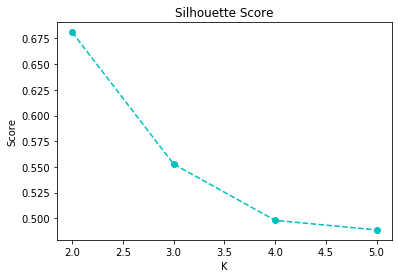

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(plotx, ploty, "co--")
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")

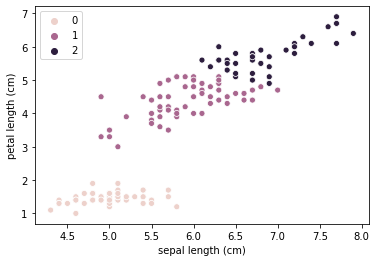

In [7]:
import seaborn as sns

# clu = KMeans(n_clusters=2)
clu = KMeans(n_clusters=3)
clu.fit(iris["data"])

sns.scatterplot(x=df["sepal length (cm)"],
                y=df["petal length (cm)"],
                hue=clu.labels_
                )